In [1]:
import pandas as pd
from sklearn.preprocessing import Normalizer, PowerTransformer, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression

### Read data

In [2]:
data_training = pd.read_csv('data/train_dataset.csv')

In [3]:
data_training

,200,200.020004272461,200.039993286133,200.059997558594,200.080001831055,200.100006103516,200.119995117188,200.139999389648,200.160003662109,200.179992675781,...,999.919982910156,999.940002441406,999.960021972656,999.97998046875,1000,1000.02001953125,Cr,Mn,Mo,Ni
0,0.000010,0.001747,0.001477,0.002694,0.001689,0.001828,0.000127,-0.000101,-0.000023,0.002150,...,0.003621,0.003494,0.003204,0.003204,0.002824,-0.000054,0.045,1.960,0.0403,22.5800
1,0.002484,0.001943,0.001610,0.002062,-0.000746,0.001947,0.002961,0.003321,-0.000938,0.000817,...,0.003975,0.003234,0.001542,0.001542,0.001598,-0.000065,0.045,1.960,0.0403,22.5800
2,0.000230,0.000475,0.000754,0.001994,0.000771,0.001478,0.001255,0.001335,0.001972,0.001638,...,0.002733,0.002162,0.000860,0.000860,0.001336,-0.000043,0.045,1.960,0.0403,22.5800
3,0.001029,0.000596,0.001769,0.000886,0.000491,0.002019,0.000893,-0.001186,0.001689,0.002193,...,0.003059,0.002907,0.002559,0.002559,0.002987,-0.000055,0.045,1.960,0.0403,22.5800
4,-0.003513,0.001748,0.002183,0.000505,-0.000304,0.001544,-0.000112,0.000778,0.001538,0.000532,...,0.003133,0.003745,0.005143,0.005143,0.004133,-0.000057,0.045,1.960,0.0403,22.5800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.002264,0.002402,-0.000559,0.002850,-0.000560,0.000547,-0.000071,0.000628,0.000101,0.001593,...,0.002244,0.002513,0.003128,0.003128,0.003266,-0.000058,4.510,0.303,3.6000,0.0309
2096,0.008210,0.000836,0.000103,0.000765,0.000508,0.005778,0.001087,0.000222,0.008658,0.001648,...,0.003443,0.002637,0.000800,0.000800,0.002035,-0.000156,4.510,0.303,3.6000,0.0309
2097,0.000226,0.006540,0.000969,-0.000720,0.002583,0.004462,0.004571,0.006759,0.003972,-0.000213,...,0.004118,0.003721,0.002817,0.002817,0.002840,-0.000084,4.510,0.303,3.6000,0.0309
2098,0.000237,0.003592,0.000563,0.000284,0.000141,0.000787,0.001087,0.002731,0.000774,-0.000290,...,0.003966,0.003397,0.002099,0.002099,0.002376,-0.000057,4.510,0.303,3.6000,0.0309


### Divide into dependent and independent variables

In [4]:
X_training = data_training.drop(['Cr','Mn','Mo','Ni'], axis = 1)

y_training_Cr = data_training['Cr']
y_training_Mn = data_training['Mn']
y_training_Mo = data_training['Mo']
y_training_Ni = data_training['Ni']

### PCA test

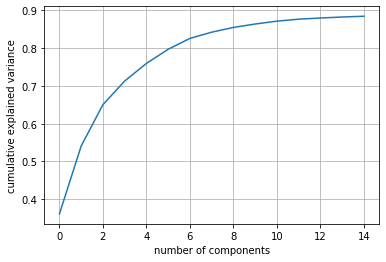

In [5]:
pca = PCA(n_components=15).fit(X_training)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

In [6]:
pd.DataFrame({'PCA' : pca.explained_variance_ratio_})

,PCA
0,0.361053
1,0.179683
2,0.109547
3,0.062652
4,0.046600
5,0.037529
6,0.028806
7,0.016449
8,0.012584
9,0.009051


### Replace every 3 column by its average - dimension reduction

In [7]:
def avg_wavelengths(X):
    X_avg = pd.DataFrame()
    for i in range(1,len(X.columns)-1,3):
        X_avg[(float(X.columns[i-1])+float(X.columns[i])+float(X.columns[i+1]))/3.0] = (X[X.columns[i-1]]+X[X.columns[i]]+X[X.columns[i+1]])/3.0
    return X_avg

In [8]:
X_avg = avg_wavelengths(X_training)

C:\Users\marci\AppData\Local\Temp/ipykernel_21032/811757240.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X_avg[(float(X.columns[i-1])+float(X.columns[i])+float(X.columns[i+1]))/3.0] = (X[X.columns[i-1]]+X[X.columns[i]]+X[X.columns[i+1]])/3.0


In [10]:
X_avg.shape

(2100, 13334)

### PCA test

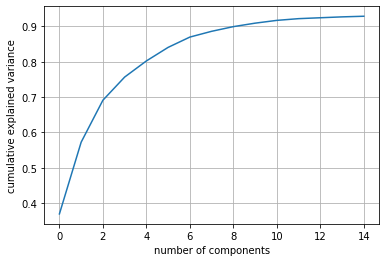

In [11]:
pca = PCA(n_components=15).fit(X_avg)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

In [20]:
def select_wavelengts_with_big_variance(X, amount):
    return X.reindex(sorted(X[X.var().nlargest(amount).index]), axis=1)

In [23]:
X_selected = select_wavelengts_with_big_variance(X_avg, 5000)

### PCA - test

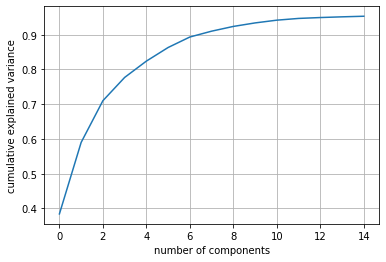

In [39]:
pca = PCA(n_components=15).fit(X_selected)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

In [36]:
def correlation(X, y_Cr, y_Mn, y_Mo, y_Ni):
    data_corr_Cr = []
    data_corr_Mn = []
    data_corr_Mo = []
    data_corr_Ni = []
    
    for wavelength in X.columns:
        data_corr_Cr.append(np.corrcoef(y_Cr, X[wavelength])[0,1])
        data_corr_Mn.append(np.corrcoef(y_Mn, X[wavelength])[0,1])
        data_corr_Mo.append(np.corrcoef(y_Mo, X[wavelength])[0,1])
        data_corr_Ni.append(np.corrcoef(y_Ni, X[wavelength])[0,1])
    
    return pd.DataFrame({'Cr': data_corr_Cr, 'Mn': data_corr_Mn, 'Mo': data_corr_Mo, 'Ni': data_corr_Ni}, index = X.columns)

In [38]:
data_corr = correlation(X_selected, y_training_Cr, y_training_Mn, y_training_Mo, y_training_Ni)

In [55]:
data_corr.sort_values(['Cr', 'Mn', 'Mo', 'Ni'], ascending = [False, False, False, False])

,Cr,Mn,Mo,Ni
286.720001,0.852618,-0.124840,0.206130,0.106033
285.940002,0.852571,-0.125340,0.196851,0.078359
286.299998,0.851744,-0.124644,0.198172,0.106654
285.039998,0.850746,-0.128379,0.182725,0.077817
313.240000,0.850607,-0.125301,0.206209,0.118939
...,...,...,...,...
259.299998,-0.551369,0.060040,-0.124884,-0.363555
252.519999,-0.551811,-0.008747,0.025100,-0.251268
252.940002,-0.553220,-0.004076,-0.030862,-0.327824
240.460002,-0.565818,0.022456,-0.001129,-0.244139


In [140]:
def filter_lines_with_best_correlation(data_corr, X, element):
    elements = {'Cr', 'Mn', 'Mo', 'Ni'}
    elements.remove(element)
    return X[data_corr.loc[(data_corr[element] >= 0.7) & (data_corr[list(elements)[0]] < 0.5) & (data_corr[list(elements)[1]] < 0.5) & (data_corr[list(elements)[2]] < 0.5)].index]    

In [141]:
X_filtered_Cr = filter_lines_with_best_correlation(data_corr, X_selected, 'Cr')
X_filtered_Mn = filter_lines_with_best_correlation(data_corr, X_selected, 'Mn')
X_filtered_Mo = filter_lines_with_best_correlation(data_corr, X_selected, 'Mo')
X_filtered_Ni = filter_lines_with_best_correlation(data_corr, X_selected, 'Ni')

### PCA - test Cr

In [142]:
X_filtered_Cr

,265.359996,265.420003,265.900004,266.200002,266.319997,266.379995,266.620005,266.859996,266.920003,267.039998,...,458.920003,461.920003,461.980001,463.480001,482.500000,484.839996,484.900004,487.720001,523.780009,527.559998
0,0.006877,0.006544,0.007631,0.006153,0.007990,0.007878,0.014826,0.006146,0.008213,0.005117,...,0.009107,0.009470,0.009789,0.007582,0.011351,0.013615,0.012924,0.014577,0.014846,0.019694
1,0.006000,0.005182,0.007392,0.004990,0.005831,0.006572,0.010439,0.002863,0.006882,0.005016,...,0.008664,0.007509,0.008990,0.010522,0.010516,0.012917,0.013405,0.013091,0.014032,0.015094
2,0.008279,0.008419,0.008430,0.007824,0.007591,0.007736,0.018373,0.006446,0.007671,0.006337,...,0.007307,0.007952,0.008251,0.006353,0.012050,0.010247,0.011714,0.012833,0.014036,0.016549
3,0.005643,0.006538,0.005591,0.005668,0.005302,0.005664,0.012722,0.004267,0.004653,0.006218,...,0.009079,0.008296,0.008397,0.006635,0.010295,0.010643,0.010034,0.012685,0.012835,0.018428
4,0.005987,0.005834,0.008298,0.004951,0.006752,0.008134,0.016768,0.005253,0.007617,0.008498,...,0.012345,0.009512,0.011033,0.009287,0.010778,0.014128,0.012178,0.014002,0.016592,0.019551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.016630,0.006301,0.015257,0.008003,0.016634,0.021193,0.031168,0.011636,0.008666,0.010147,...,0.012350,0.015360,0.011856,0.009631,0.011470,0.015927,0.016173,0.015363,0.019057,0.018890
2096,0.018149,0.008879,0.013465,0.013399,0.022214,0.024568,0.034543,0.018537,0.013847,0.008362,...,0.011370,0.015158,0.010967,0.009405,0.005212,0.014043,0.011476,0.015186,0.014069,0.026536
2097,0.027809,0.011253,0.019855,0.016197,0.032081,0.038963,0.054759,0.018758,0.017841,0.016750,...,0.015275,0.017723,0.019096,0.012450,0.013506,0.021740,0.016949,0.018071,0.019096,0.028411
2098,0.020391,0.008326,0.016425,0.010726,0.020987,0.025963,0.040763,0.019731,0.014002,0.011620,...,0.012637,0.013599,0.012840,0.008998,0.011351,0.017930,0.017226,0.016990,0.019800,0.019483


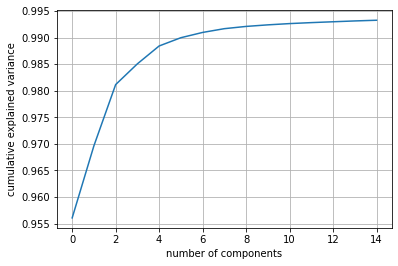

In [143]:
pca = PCA(n_components=15).fit(X_filtered_Cr)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

### PCA - test Mn

In [144]:
X_filtered_Mn

,255.880000,257.620005,257.680003,259.000000,259.359996,259.420003,260.559998,260.620005,261.039998,263.260000,...,295.000000,344.200002,344.260000,346.059998,346.120005,347.440002,348.279999,348.339996,348.879995,348.940002
0,0.025174,0.333122,0.079171,0.026603,0.245270,0.169429,0.210959,0.106898,0.046243,0.039813,...,0.033921,0.133897,0.089981,0.067217,0.024350,0.049405,0.035368,0.040564,0.036844,0.024870
1,0.024450,0.366353,0.078206,0.029614,0.262200,0.191000,0.200968,0.102193,0.047747,0.043061,...,0.036798,0.124866,0.086918,0.059406,0.016055,0.041310,0.026178,0.031928,0.031900,0.015846
2,0.025265,0.345609,0.095519,0.032084,0.258980,0.193706,0.227831,0.119712,0.052784,0.055057,...,0.039885,0.145178,0.102899,0.074074,0.027891,0.046103,0.034955,0.041362,0.042082,0.024015
3,0.019929,0.327987,0.072775,0.027984,0.231755,0.160576,0.181496,0.096155,0.044181,0.038135,...,0.027546,0.103144,0.067852,0.050669,0.015483,0.031985,0.024548,0.023399,0.025304,0.014784
4,0.023649,0.372105,0.089727,0.032300,0.273484,0.188060,0.228510,0.127054,0.049660,0.047741,...,0.039028,0.147004,0.097764,0.070726,0.022870,0.049845,0.032537,0.037279,0.040540,0.025415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.007437,0.059739,0.024683,0.010113,0.049736,0.034631,0.041518,0.022057,0.012448,0.012632,...,0.013952,0.020168,0.017745,0.009447,0.006011,0.010413,0.007235,0.009414,0.009421,0.007935
2096,0.011013,0.082912,0.041778,0.009166,0.075951,0.046764,0.062622,0.039731,0.013676,0.016457,...,0.015150,0.031733,0.015314,0.017055,0.008155,0.016321,0.012163,0.010260,0.010628,0.016565
2097,0.012767,0.122342,0.050804,0.015677,0.090514,0.058164,0.081288,0.047112,0.023402,0.027384,...,0.020722,0.038358,0.026003,0.016544,0.011345,0.013084,0.011839,0.013238,0.017487,0.016693
2098,0.007013,0.082047,0.038365,0.013957,0.059734,0.046236,0.055227,0.034104,0.014989,0.017242,...,0.015861,0.023834,0.018882,0.009918,0.007107,0.010036,0.008127,0.009267,0.010660,0.009612


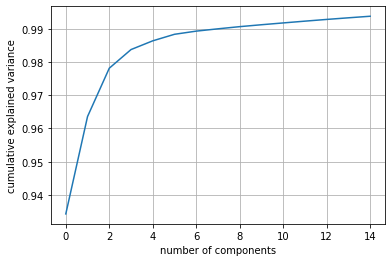

In [145]:
pca = PCA(n_components=15).fit(X_filtered_Mn)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

### PCA - test Mo

In [146]:
X_filtered_Mo

""
0
1
2
3
4
...
2095
2096
2097
2098


### PCA - test Ni

In [147]:
X_filtered_Ni

,306.640004,307.299998,307.539998,307.900004,308.799998,308.859996,316.900004,320.260000,322.299998,322.960002,...,376.000000,376.120005,376.180003,390.099996,391.359996,430.059998,453.460002,454.960002,455.019999,457.240000
0,0.009277,0.005510,0.011272,0.011939,0.004122,0.005756,0.007793,0.009347,0.007144,0.006312,...,0.010232,0.008262,0.007772,0.013396,0.011368,0.012659,0.011909,0.021908,0.015555,0.010355
1,0.006957,0.005401,0.006960,0.007940,0.005270,0.006740,0.004939,0.005847,0.003739,0.005703,...,0.007968,0.006391,0.006419,0.009542,0.008167,0.010090,0.011523,0.013490,0.011994,0.011294
2,0.010155,0.007916,0.011451,0.013306,0.006016,0.005701,0.007731,0.010673,0.009861,0.008680,...,0.011224,0.009110,0.008694,0.012265,0.011091,0.014196,0.008620,0.021921,0.015763,0.008755
3,0.006457,0.004608,0.005506,0.007644,0.004563,0.002729,0.003973,0.007525,0.005382,0.006316,...,0.005565,0.006070,0.005150,0.012322,0.011126,0.010245,0.008683,0.015691,0.011537,0.009785
4,0.008700,0.005274,0.010589,0.010371,0.006428,0.006950,0.007642,0.009443,0.006934,0.007397,...,0.009762,0.008293,0.008595,0.012008,0.014140,0.014790,0.012205,0.021354,0.016492,0.010811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.010449,0.005755,0.007154,0.006039,0.009833,0.010915,0.007705,0.008064,0.005910,0.002816,...,0.008854,0.005121,0.003741,0.010522,0.011758,0.010809,0.010949,0.015822,0.013496,0.009074
2096,0.025217,0.002914,0.014478,0.008353,0.013593,0.009830,0.009593,0.015031,0.008681,0.010553,...,0.010631,0.010108,0.009120,0.011048,0.015258,0.012239,0.009687,0.021584,0.016006,0.009344
2097,0.033606,0.010261,0.015895,0.013589,0.015897,0.015590,0.010394,0.023489,0.007302,0.010780,...,0.013096,0.009463,0.008025,0.013942,0.014633,0.016008,0.011880,0.023386,0.021235,0.015482
2098,0.015953,0.008023,0.009140,0.010012,0.011495,0.011015,0.008672,0.012152,0.006124,0.005047,...,0.008032,0.007469,0.005087,0.012078,0.009512,0.010479,0.009190,0.015590,0.014642,0.010487


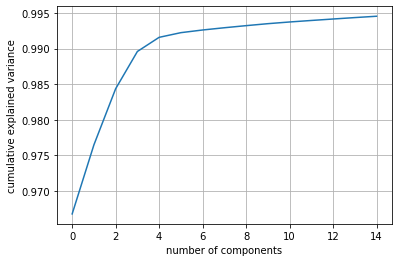

In [148]:
pca = PCA(n_components=15).fit(X_filtered_Ni)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

### Save files

In [149]:
X_filtered_Cr['Cr'] = data_training['Cr']
X_filtered_Cr.to_csv("preprocessed-data/data_Cr.csv",index=False)


C:\Users\marci\AppData\Local\Temp/ipykernel_21032/868061082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filtered_Cr['Cr'] = data_training['Cr']


In [150]:
X_filtered_Mn['Mn'] = data_training['Mn']
X_filtered_Mn.to_csv("preprocessed-data/data_Mn.csv",index=False)

C:\Users\marci\AppData\Local\Temp/ipykernel_21032/421991348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filtered_Mn['Mn'] = data_training['Mn']


In [ ]:
X_filtered_Mo['Mo'] = data_training['Mo']
X_filtered_Mo.to_csv("preprocessed-data/data_Mo.csv",index=False)

In [151]:
X_filtered_Ni['Ni'] = data_training['Ni']
X_filtered_Ni.to_csv("preprocessed-data/data_Ni.csv",index=False)

C:\Users\marci\AppData\Local\Temp/ipykernel_21032/2021994637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filtered_Ni['Ni'] = data_training['Ni']
